In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gp

In [3]:
from sklearn.cluster import KMeans

*DATA OVERVIEW*

In [4]:
df = pd.read_excel(r"C:\Users\amali\Downloads\NYC TLC Trip Record.xlsx")


In [5]:
df.describe()


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,68211,68211,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,2023-01-16 20:10:27.977305600,2023-01-16 20:28:33.803932160,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
min,1.000000,2009-01-01 20:21:00,2009-01-02 11:07:00,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,2023-01-09 11:59:30,2023-01-09 12:16:00,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,2023-01-17 08:40:00,2023-01-17 08:56:00,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,2023-01-24 15:52:00,2023-01-24 16:06:00,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,2023-02-01 03:10:00,2023-02-01 17:27:00,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000
std,0.343820,NaN,NaN,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               68211 non-null  int64         
 1   lpep_pickup_datetime   68211 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  68211 non-null  datetime64[ns]
 3   store_and_fwd_flag     63887 non-null  object        
 4   RatecodeID             63887 non-null  float64       
 5   PULocationID           68211 non-null  int64         
 6   DOLocationID           68211 non-null  int64         
 7   passenger_count        63887 non-null  float64       
 8   trip_distance          68211 non-null  float64       
 9   fare_amount            68211 non-null  float64       
 10  extra                  68211 non-null  float64       
 11  mta_tax                68211 non-null  float64       
 12  tip_amount             68211 non-null  float64       
 13  t

In [7]:
import folium

**Data Info**


based on the data info below we can identify of the following
1. We have 68211 data accross variable. Variables that picked up less data indicates the presence of Null since the df.info would count all the non-null. 
2. We have one empty column *ehail_fee*
3. There is an anomaly on passanger count since it recognizes the data as float (meaning that some values are not integer/whole)



In [8]:
df.drop_duplicates()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:00,2023-01-01 00:37:00,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:00,2023-01-01 00:57:00,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:00,2023-01-01 00:41:00,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:00,2023-01-01 00:19:00,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:00,2023-01-01 00:39:00,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               68211 non-null  int64         
 1   lpep_pickup_datetime   68211 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  68211 non-null  datetime64[ns]
 3   store_and_fwd_flag     63887 non-null  object        
 4   RatecodeID             63887 non-null  float64       
 5   PULocationID           68211 non-null  int64         
 6   DOLocationID           68211 non-null  int64         
 7   passenger_count        63887 non-null  float64       
 8   trip_distance          68211 non-null  float64       
 9   fare_amount            68211 non-null  float64       
 10  extra                  68211 non-null  float64       
 11  mta_tax                68211 non-null  float64       
 12  tip_amount             68211 non-null  float64       
 13  t

**MISSING VALUES**

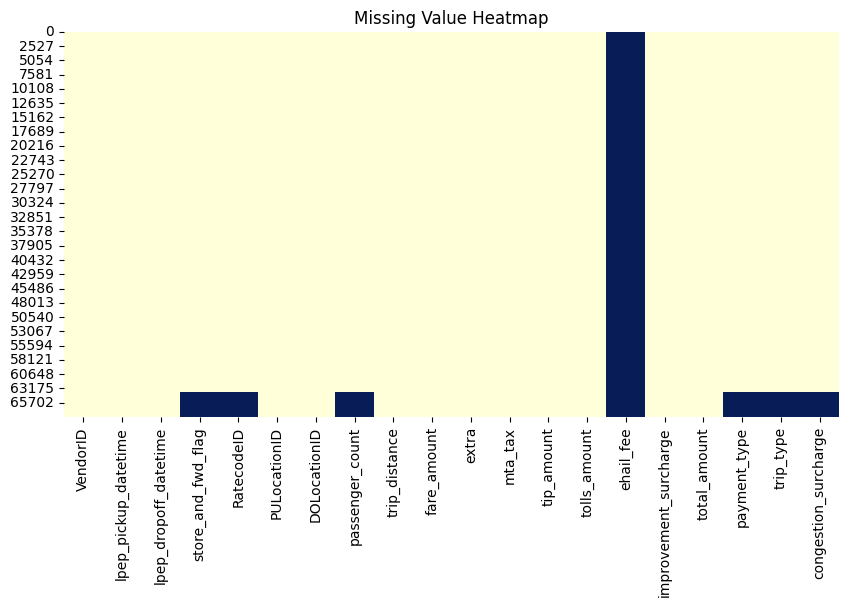

In [10]:
df.isnull().sum().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap="YlGnBu")
plt.title("Missing Value Heatmap")
plt.show()

**Missing Value Heatmap** 


The dataset is generally complete. 
There are three main categories of missigness and this data suggests an MCAR which means that the missing values have no relationship with any variable, including itself.Hence, we are likely to be able to proceed with simple imputation. 

In [11]:

missing_per_column = (df.isnull().sum() / len(df)) * 100


missing_summary = pd.DataFrame({
    'Missing Count': df.isnull().sum(),
    'Missing %': missing_per_column.round(2)
}).sort_values('Missing %', ascending=False)

print("Missing Values per Column:")
print(missing_summary)


Missing Values per Column:
                       Missing Count  Missing %
ehail_fee                      68211     100.00
trip_type                       4334       6.35
store_and_fwd_flag              4324       6.34
RatecodeID                      4324       6.34
congestion_surcharge            4324       6.34
payment_type                    4324       6.34
passenger_count                 4324       6.34
VendorID                           0       0.00
lpep_dropoff_datetime              0       0.00
lpep_pickup_datetime               0       0.00
PULocationID                       0       0.00
DOLocationID                       0       0.00
mta_tax                            0       0.00
extra                              0       0.00
fare_amount                        0       0.00
trip_distance                      0       0.00
improvement_surcharge              0       0.00
tolls_amount                       0       0.00
tip_amount                         0       0.00
total_amount 

In [12]:
df['passenger_count'].fillna(1, inplace=True)


C:\Users\amali\AppData\Local\Temp\ipykernel_22796\191192571.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['passenger_count'].fillna(1, inplace=True)


In [13]:
df.drop(columns=['ehail_fee'], inplace=True)



In [14]:
df.isnull().sum()


VendorID                    0
lpep_pickup_datetime        0
lpep_dropoff_datetime       0
store_and_fwd_flag       4324
RatecodeID               4324
PULocationID                0
DOLocationID                0
passenger_count             0
trip_distance               0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
payment_type             4324
trip_type                4334
congestion_surcharge     4324
dtype: int64

In [15]:
df['store_and_fwd_flag'].fillna(df['store_and_fwd_flag'].mode()[0], inplace=True)
df['RatecodeID'].fillna(df['RatecodeID'].mode()[0], inplace=True)
df['payment_type'].fillna(df['payment_type'].mode()[0], inplace=True)
df['trip_type'].fillna(df['trip_type'].mode()[0], inplace=True)

C:\Users\amali\AppData\Local\Temp\ipykernel_22796\725285074.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['store_and_fwd_flag'].fillna(df['store_and_fwd_flag'].mode()[0], inplace=True)
C:\Users\amali\AppData\Local\Temp\ipykernel_22796\725285074.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

In [16]:
df['congestion_surcharge'].fillna(0, inplace=True)

C:\Users\amali\AppData\Local\Temp\ipykernel_22796\910728107.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['congestion_surcharge'].fillna(0, inplace=True)


In [17]:
df.isna().sum()


VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
dtype: int64

In [18]:
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'], errors='coerce')



In [19]:
df['congestion_surcharge'] = np.where(
    df['lpep_pickup_datetime'] < '2019-02-01',
    0,df['congestion_surcharge'])

An extra charge applied to trips entering or originating in congested zones, mainly in Manhattan south of 96th Street, introduced in February 2019 by NYC TLC.

In [20]:
df.describe()


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,68211,68211,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000
mean,1.863028,2023-01-16 20:10:27.977305600,2023-01-16 20:28:33.803932160,1.109733,98.549735,138.429901,1.295847,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,0.951625,21.789377,1.349929,1.020539,0.680678
min,1.000000,2009-01-01 20:21:00,2009-01-02 11:07:00,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,2023-01-09 11:59:30,2023-01-09 12:16:00,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,2023-01-17 08:40:00,2023-01-17 08:56:00,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,2023-01-24 15:52:00,2023-01-24 16:06:00,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,1.000000,26.150000,2.000000,1.000000,0.000000
max,2.000000,2023-02-01 03:10:00,2023-02-01 17:27:00,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,1.000000,491.000000,5.000000,2.000000,2.750000
std,0.343820,NaN,NaN,1.328991,61.244314,76.761311,0.950635,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,0.196875,15.457115,0.500030,0.141837,1.187047


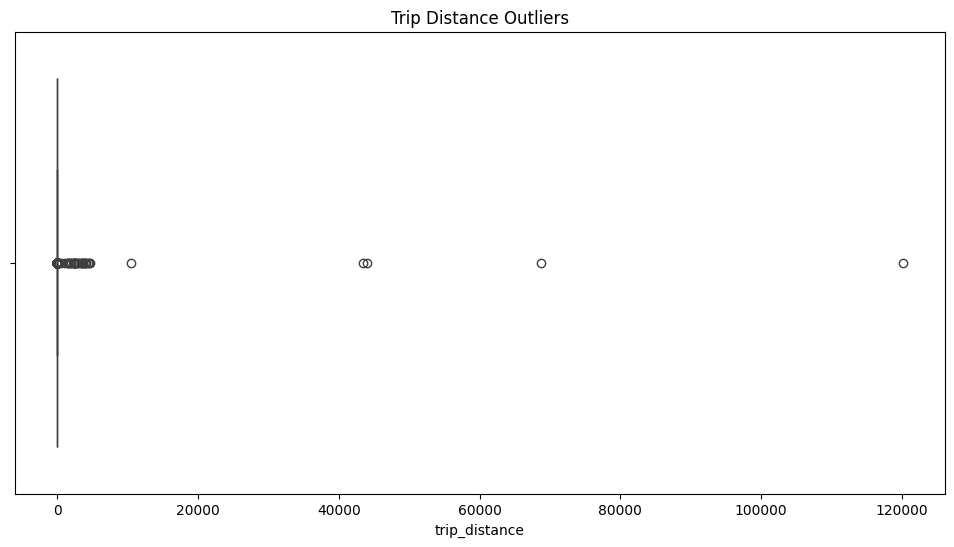

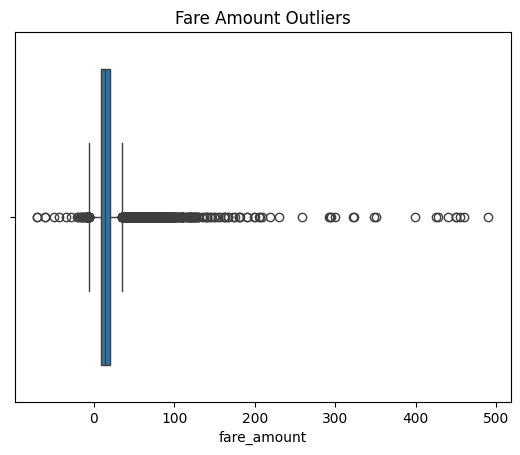

In [21]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df['trip_distance'])
plt.title("Trip Distance Outliers")
plt.show()

sns.boxplot(x=df['fare_amount'])
plt.title("Fare Amount Outliers")
plt.show()

In [22]:
df['trip_duration'] = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).dt.total_seconds() / 60

df['trip_duration'].describe()


count    68211.000000
mean        18.097110
std         74.930239
min          0.000000
25%          7.000000
50%         11.000000
75%         17.000000
max       1440.000000
Name: trip_duration, dtype: float64

In [23]:
print("Dataset shape:", df.shape)
print(df[['trip_distance', 'fare_amount', 'total_amount', 'tip_amount','trip_duration']].describe())

Dataset shape: (68211, 20)
       trip_distance   fare_amount  total_amount    tip_amount  trip_duration
count   68211.000000  68211.000000  68211.000000  68211.000000   68211.000000
mean        8.114852     16.603545     21.789377      2.139012      18.097110
std       585.105955     13.470121     15.457115      3.052710      74.930239
min         0.000000    -70.000000    -71.500000    -10.500000       0.000000
25%         1.110000      9.300000     12.900000      0.000000       7.000000
50%         1.850000     13.500000     17.900000      1.600000      11.000000
75%         3.210000     19.800000     26.150000      3.330000      17.000000
max    120098.840000    490.000000    491.000000    222.220000    1440.000000


In [24]:
def outlier_bounds(series):
    """Calculate IQR-based lower and upper bounds."""
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return lower, upper

In [25]:
cols = ['trip_distance', 'fare_amount', 'total_amount', 'tip_amount','trip_duration']
for col in cols:
    lower, upper = outlier_bounds(df[col])
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"\nColumn: {col}")
    print(f"Lower bound: {lower:.2f}, Upper bound: {upper:.2f}")
    print(f"Outliers detected: {len(outliers)} ({(len(outliers)/len(df))*100:.2f}%)")


Column: trip_distance
Lower bound: -2.04, Upper bound: 6.36
Outliers detected: 5774 (8.46%)

Column: fare_amount
Lower bound: -6.45, Upper bound: 35.55
Outliers detected: 4339 (6.36%)

Column: total_amount
Lower bound: -6.97, Upper bound: 46.02
Outliers detected: 4064 (5.96%)

Column: tip_amount
Lower bound: -5.00, Upper bound: 8.32
Outliers detected: 2045 (3.00%)

Column: trip_duration
Lower bound: -8.00, Upper bound: 32.00
Outliers detected: 3665 (5.37%)


In [26]:
df = df[(df['trip_distance'] > 0) & (df['trip_distance'] <= 100)]

In [27]:
df = df[df['trip_distance'] > 0]
df = df[df['fare_amount'] > 0]
df = df[df['total_amount'] > 0]
df = df[df['trip_duration'] > 0]

In [28]:
df.loc[df['trip_distance'] < 50]
df.loc[df['fare_amount'] < 200]
df.loc[df['total_amount'] < 300]
df.loc[df['tip_amount'] < 100]
df.loc[df['trip_duration'] < 180]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_duration
0,2,2023-01-01 00:26:00,2023-01-01 00:37:00,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75,11.0
1,2,2023-01-01 00:51:00,2023-01-01 00:57:00,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00,6.0
3,1,2023-01-01 00:13:00,2023-01-01 00:19:00,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00,6.0
4,1,2023-01-01 00:33:00,2023-01-01 00:39:00,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00,6.0
5,2,2023-01-01 00:53:00,2023-01-01 01:11:00,N,1.0,41,262,1.0,2.78,17.70,1.0,0.5,0.00,0.0,1.0,22.95,2.0,1.0,2.75,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68205,2,2023-01-31 21:56:00,2023-01-31 22:14:00,N,1.0,75,186,1.0,3.92,20.72,0.0,0.0,1.25,0.0,0.3,25.02,1.0,1.0,0.00,18.0
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,N,1.0,10,205,1.0,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,1.0,1.0,0.00,8.0
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,N,1.0,66,37,1.0,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,1.0,1.0,0.00,16.0
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,N,1.0,225,189,1.0,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,1.0,1.0,0.00,18.0


In [29]:
df.describe()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_duration
count,64369.000000,64369,64369,64369.000000,64369.000000,64369.000000,64369.000000,64369.000000,64369.000000,64369.000000,64369.000000,64369.000000,64369.000000,64369.000000,64369.000000,64369.000000,64369.000000,64369.000000,64369.000000
mean,1.879802,2023-01-16 20:37:21.851823104,2023-01-16 20:55:34.619149056,1.069164,97.394476,138.332691,1.303982,2.821593,16.453850,0.859641,0.580497,2.204183,0.156776,0.958028,21.768159,1.345337,1.010642,0.714599,18.212789
min,1.000000,2009-01-01 20:21:00,2009-01-02 11:07:00,1.000000,3.000000,1.000000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,1.010000,1.000000,1.000000,0.000000,1.000000
25%,2.000000,2023-01-09 12:23:00,2023-01-09 12:39:00,1.000000,74.000000,74.000000,1.000000,1.230000,9.300000,0.000000,0.500000,0.000000,0.000000,1.000000,12.960000,1.000000,1.000000,0.000000,7.000000
50%,2.000000,2023-01-17 09:16:00,2023-01-17 09:32:00,1.000000,75.000000,138.000000,1.000000,1.940000,13.190000,0.000000,0.500000,1.830000,0.000000,1.000000,17.940000,1.000000,1.000000,0.000000,11.000000
75%,2.000000,2023-01-24 16:05:00,2023-01-24 16:21:00,1.000000,116.000000,220.000000,1.000000,3.340000,19.700000,1.000000,0.500000,3.410000,0.000000,1.000000,26.050000,2.000000,1.000000,2.750000,17.000000
max,2.000000,2023-02-01 03:10:00,2023-02-01 17:27:00,99.000000,265.000000,265.000000,7.000000,66.180000,455.000000,7.500000,1.500000,222.220000,36.050000,1.000000,456.000000,4.000000,2.000000,2.750000,1439.000000
std,0.325195,NaN,NaN,1.301434,59.982933,76.471608,0.963227,2.797655,12.164429,1.281659,0.360820,3.003034,1.051439,0.166960,14.340223,0.485697,0.102609,1.205969,75.637219


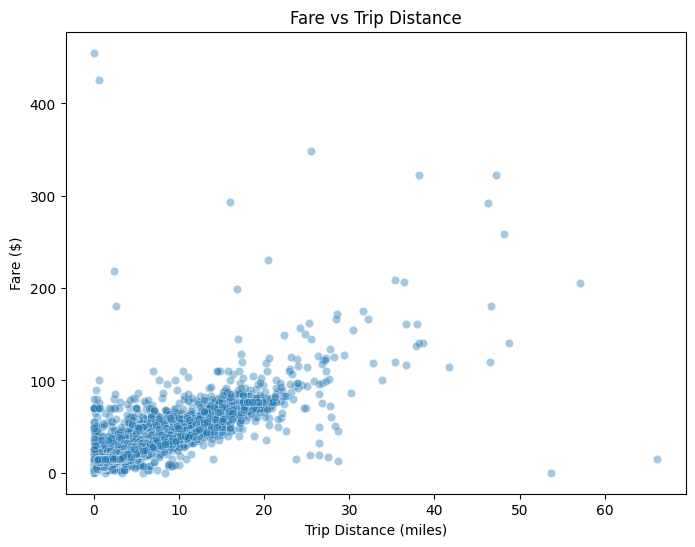

In [30]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="trip_distance", y="fare_amount", alpha=0.4)
plt.title("Fare vs Trip Distance")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare ($)")
plt.show()

In [31]:
df[(df['trip_distance'] < 0.5) & (df['fare_amount'] > 20)][['trip_distance','fare_amount']].head(10)


,trip_distance,fare_amount
147,0.32,25.0
208,0.03,50.0
215,0.12,30.0
1330,0.01,55.0
2327,0.46,52.0
3296,0.36,80.0
4444,0.37,25.0
6070,0.42,60.0
6885,0.28,90.0
7113,0.20,40.8


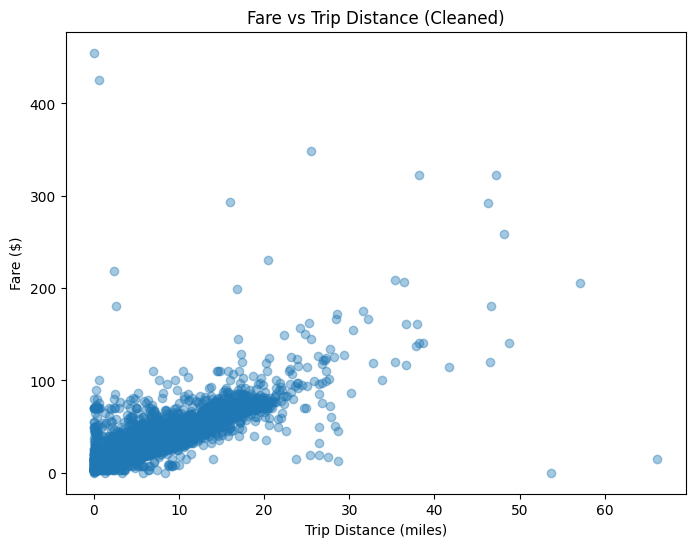

In [32]:
plt.figure(figsize=(8,6))
plt.scatter(df['trip_distance'], df['fare_amount'], alpha=0.4)
plt.title("Fare vs Trip Distance (Cleaned)")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare ($)")
plt.show()


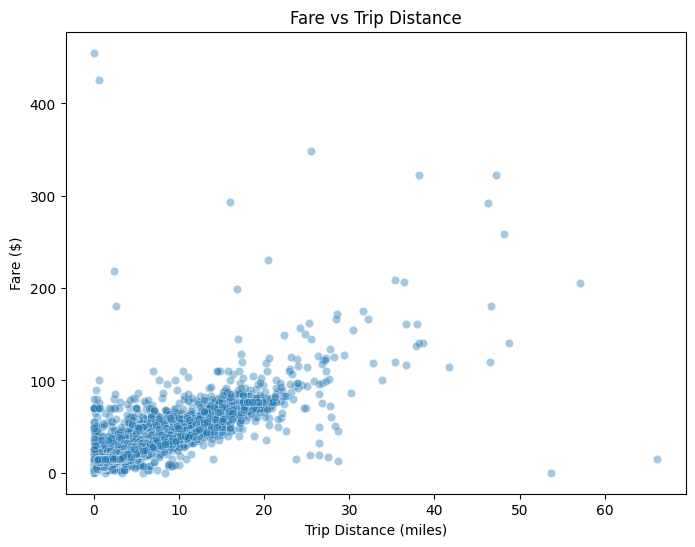

In [33]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="trip_distance", y="fare_amount", alpha=0.4)
plt.title("Fare vs Trip Distance")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare ($)")
plt.show()

In [34]:

df['distance_category'] = pd.cut(
    df['trip_distance'],
    bins=[0, 2, 5, 10, 20, 40, 100],
    labels=['0-2 mi', '2-5 mi', '5-10 mi', '10-20 mi', '20-40 mi', '40+ mi']
)


pivot = df.pivot_table(
    values='fare_amount',
    index='distance_category',
    aggfunc=['mean', 'median', 'count']
).reset_index()

pivot.columns = ['Distance Range', 'Avg Fare ($)', 'Median Fare ($)', 'Trip Count']
pivot


C:\Users\amali\AppData\Local\Temp\ipykernel_22796\2501420279.py:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(
C:\Users\amali\AppData\Local\Temp\ipykernel_22796\2501420279.py:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(
C:\Users\amali\AppData\Local\Temp\ipykernel_22796\2501420279.py:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(


,Distance Range,Avg Fare ($),Median Fare ($),Trip Count
0,0-2 mi,9.727203,9.30,33329
1,2-5 mi,18.180203,17.16,22356
2,5-10 mi,32.344961,31.00,6996
3,10-20 mi,56.849904,54.10,1559
4,20-40 mi,100.170588,89.80,119
5,40+ mi,164.861000,160.40,10


In [48]:
df['fare_per_mile'] = df['fare_amount'] / df['trip_distance']
expected_rates = {
    '0-2 mi': 9.30 / 2,     # ≈ $4.65/mi
    '2-5 mi': 17.16 / 3.5,  # ≈ $4.9/mi
    '5-10 mi': 31.00 / 7.5, # ≈ $4.1/mi
    '10-20 mi': 54.10 / 15, # ≈ $3.6/mi
    '20-40 mi': 87.70 / 30  # ≈ $2.9/mi
}


C:\Users\amali\AppData\Local\Temp\ipykernel_22796\171494835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fare_per_mile'] = df['fare_amount'] / df['trip_distance']


In [ ]:
df = df[
    (df['fare_per_mile'] >= 1.5) &  
    (df['fare_per_mile'] <= 2 * df['fare_per_mile'].median()) & 
    (df['fare_per_mile'] <= 15) 
]

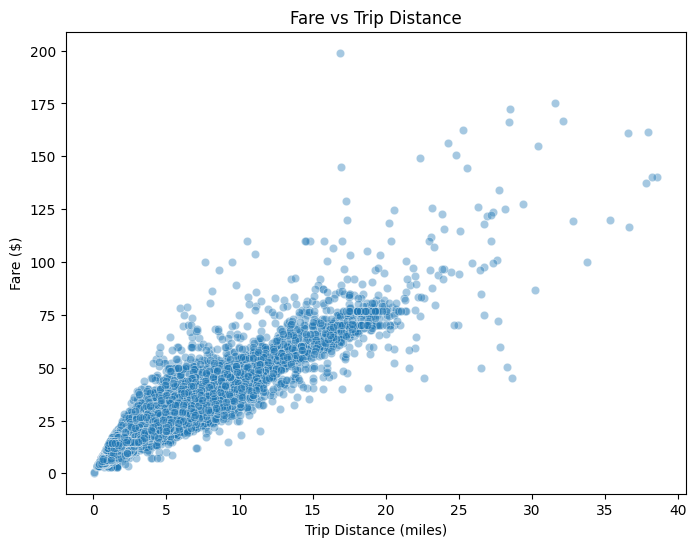

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="trip_distance", y="fare_amount", alpha=0.4)
plt.title("Fare vs Trip Distance")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare ($)")
plt.show()

In [65]:
df.to_excel(r"C:\Users\amali\Downloads\NYC_TLC_Cleaned_for_Report.xlsx", index=False)


**Visualization**

In [ ]:
df["hour"] = df["lpep_pickup_datetime"].dt.hour
df["day_of_week"] = df["lpep_pickup_datetime"].dt.day_name()
df["month"] = df["lpep_pickup_datetime"].dt.month_name()

C:\Users\amali\AppData\Local\Temp\ipykernel_15316\2143399490.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="hour", data=df, palette="crest")


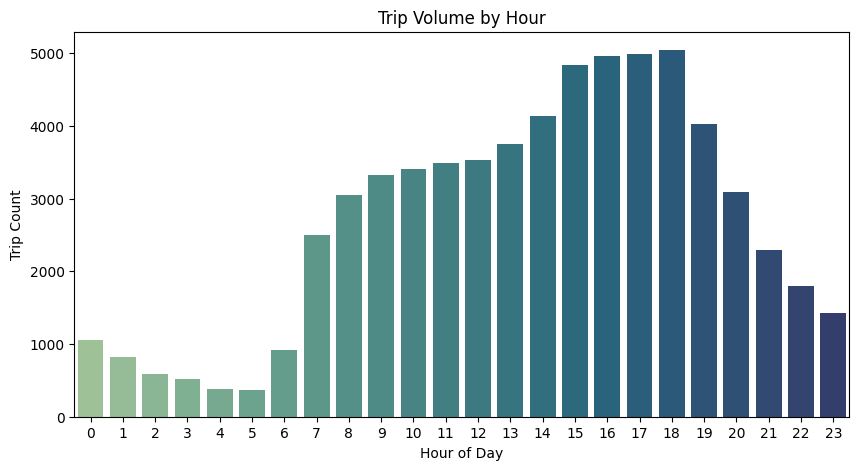

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x="hour", data=df, palette="crest")
plt.title("Trip Volume by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Trip Count")
plt.show()

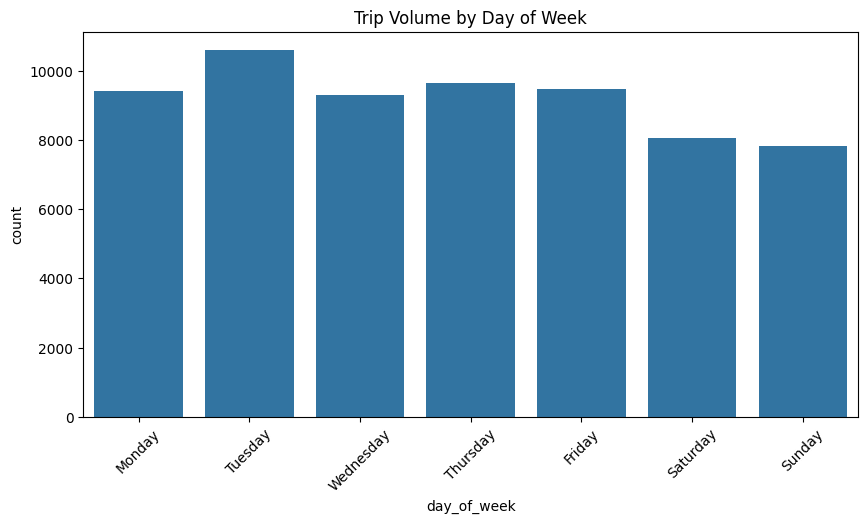

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x="day_of_week", data=df, order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.title("Trip Volume by Day of Week")
plt.xticks(rotation=45)
plt.show()

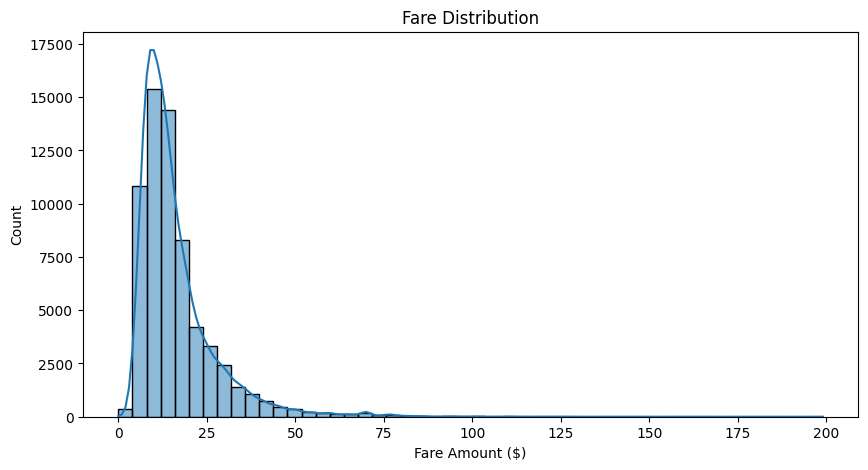

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df["fare_amount"], bins=50, kde=True)
plt.title("Fare Distribution")
plt.xlabel("Fare Amount ($)")
plt.show()

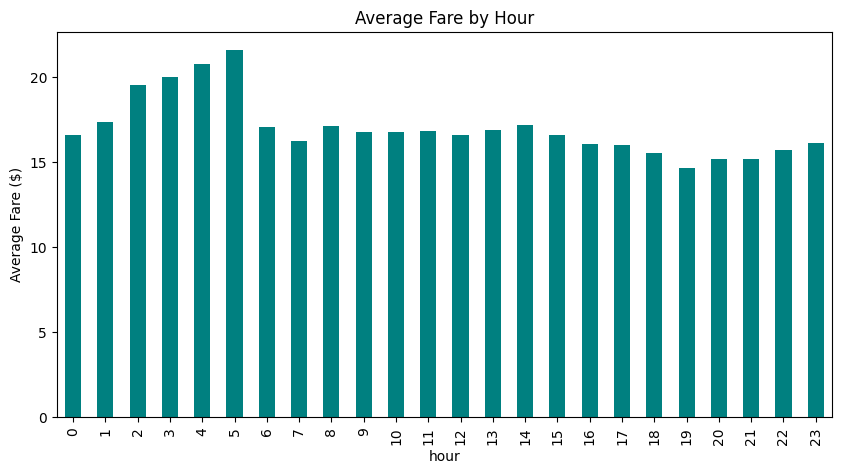

In [ ]:
avg_fare_hour = df.groupby("hour")["fare_amount"].mean()
avg_fare_hour.plot(kind="bar", figsize=(10,5), color="teal")
plt.title("Average Fare by Hour")
plt.ylabel("Average Fare ($)")
plt.show()

In [ ]:
zone_lookup = pd.read_excel(r"C:\Users\amali\Downloads\taxi_zone_lookup_.xlsx")
zone_lookup.head()


,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [ ]:
df = df.merge(
    zone_lookup[['LocationID', 'Borough']],
    left_on='PULocationID',
    right_on='LocationID',
    how='left'
).rename(columns={'Borough': 'Pickup_Borough'}).drop(columns='LocationID')


df = df.merge(
    zone_lookup[['LocationID', 'Borough']],
    left_on='DOLocationID',
    right_on='LocationID',
    how='left'
).rename(columns={'Borough': 'Dropoff_Borough'}).drop(columns='LocationID')


df[['PULocationID', 'Pickup_Borough', 'DOLocationID', 'Dropoff_Borough']].head()

,PULocationID,Pickup_Borough,DOLocationID,Dropoff_Borough
0,166,Manhattan,143,Manhattan
1,24,Manhattan,43,Manhattan
2,41,Manhattan,238,Manhattan
3,41,Manhattan,74,Manhattan
4,41,Manhattan,262,Manhattan


In [ ]:
trip_matrix = df.pivot_table(
    index='Pickup_Borough',
    columns='Dropoff_Borough',
    values='PULocationID',   # any column just to count
    aggfunc='count',
    fill_value=0
)
trip_matrix


Dropoff_Borough,Bronx,Brooklyn,EWR,Manhattan,Queens,Staten Island,Unknown
Pickup_Borough,,,,,,,
Bronx,518,6,0,252,25,0,1
Brooklyn,15,6046,7,1574,437,1,6
Manhattan,1430,223,7,34989,887,0,16
Queens,38,486,6,900,14366,0,23
Staten Island,0,1,0,0,0,7,0
Unknown,0,1,0,0,2,0,12


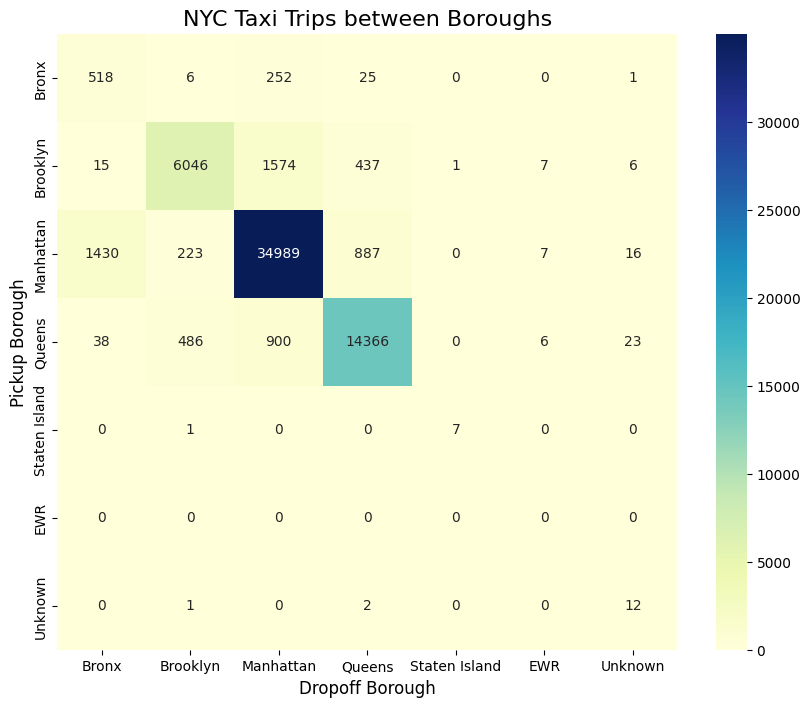

In [ ]:
matrix = pd.crosstab(df['Pickup_Borough'], df['Dropoff_Borough'])

borough_order = ["Bronx", "Brooklyn", "Manhattan", "Queens", "Staten Island", "EWR", "Unknown"]

matrix = matrix.reindex(index=borough_order, columns=borough_order, fill_value=0)


plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, fmt='d', cmap='YlGnBu')

plt.title("NYC Taxi Trips between Boroughs", fontsize=16)
plt.xlabel("Dropoff Borough", fontsize=12)
plt.ylabel("Pickup Borough", fontsize=12)

plt.show()

In [41]:
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'], errors='coerce')
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'], errors='coerce')

df['trip_duration_min'] = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).dt.total_seconds() / 60
df = df[df['trip_duration_min'] <= 180]
df.sort_values(by='trip_duration_min', ascending=False).head(10)



,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_duration,distance_category,trip_duration_minutes,duration_category,trip_duration_min
62569,2,2023-01-31 13:21:00,2023-01-31 16:13:00,N,1.0,166,166,1.0,16.94,145.1,...,1.0,156.60,1.0,1.0,0.00,172.0,10-20 mi,172.0,120–240,172.0
3560,2,2023-01-03 13:05:00,2023-01-03 15:48:00,N,5.0,134,134,1.0,22.62,45.0,...,1.0,52.55,2.0,1.0,0.00,163.0,20-40 mi,163.0,120–240,163.0
5906,2,2023-01-04 15:57:00,2023-01-04 18:35:00,N,1.0,97,107,1.0,30.40,154.9,...,1.0,172.25,2.0,1.0,2.75,158.0,20-40 mi,158.0,120–240,158.0
51422,2,2023-01-26 06:10:00,2023-01-26 08:42:00,N,1.0,223,223,1.0,17.27,129.0,...,1.0,130.50,2.0,1.0,0.00,152.0,10-20 mi,152.0,120–240,152.0
21587,2,2023-01-11 21:28:00,2023-01-12 00:00:00,N,1.0,134,197,1.0,1.63,10.7,...,1.0,13.20,1.0,1.0,0.00,152.0,0-2 mi,152.0,120–240,152.0
39261,1,2023-01-20 13:43:00,2023-01-20 16:13:00,N,1.0,61,177,2.0,10.60,83.5,...,1.0,85.00,2.0,1.0,0.00,150.0,10-20 mi,150.0,120–240,150.0
23993,2,2023-01-12 21:42:00,2023-01-13 00:00:00,N,1.0,181,61,1.0,2.14,21.9,...,1.0,24.40,1.0,1.0,0.00,138.0,2-5 mi,138.0,120–240,138.0
9055,1,2023-01-05 20:33:00,2023-01-05 22:46:00,N,99.0,14,123,1.0,6.20,28.2,...,1.0,29.70,1.0,1.0,0.00,133.0,5-10 mi,133.0,120–240,133.0
55256,2,2023-01-27 17:04:00,2023-01-27 19:17:00,N,1.0,223,223,1.0,11.06,103.8,...,1.0,107.80,2.0,1.0,0.00,133.0,10-20 mi,133.0,120–240,133.0
48897,2,2023-01-25 06:37:00,2023-01-25 08:45:00,N,1.0,223,74,1.0,20.26,118.5,...,1.0,126.55,2.0,1.0,0.00,128.0,20-40 mi,128.0,120–240,128.0


In [42]:
df['avg_speed_mph'] = df['trip_distance'] / (df['trip_duration'] / 60)
df[['avg_speed_mph']].head()


C:\Users\amali\AppData\Local\Temp\ipykernel_22796\2740930679.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['avg_speed_mph'] = df['trip_distance'] / (df['trip_duration'] / 60)


,avg_speed_mph
0,14.072727
1,18.100000
3,13.000000
4,11.000000
5,9.266667


In [ ]:
impossible_speed = df[(df['avg_speed_mph'] <= 0) | (df['avg_speed_mph'] > 100)]
impossible_speed[['trip_distance', 'trip_duration', 'avg_speed_mph', 'fare_amount']].sort_values(by='avg_speed_mph', ascending=False).head(20)
len(impossible_speed)
df = df[(df['avg_speed_mph'] > 0) & (df['avg_speed_mph'] < 100)]


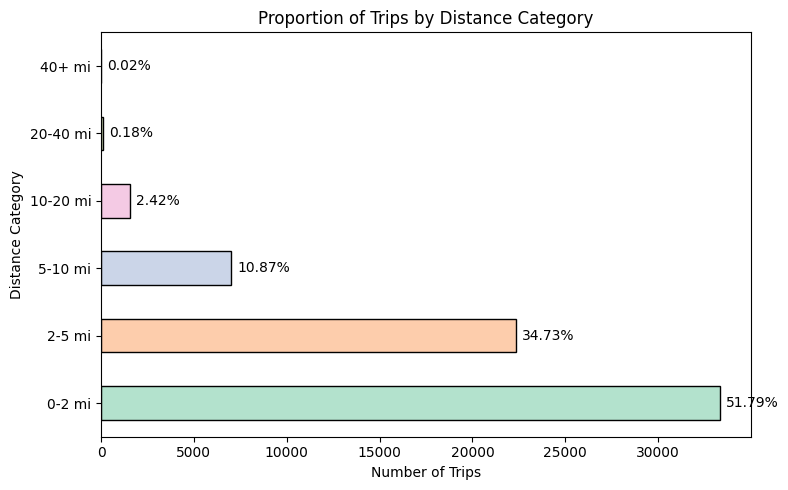

In [ ]:

category_counts = df['distance_category'].value_counts().sort_index()

plt.figure(figsize=(8,5))
category_counts.plot(
    kind='barh',
    color=plt.cm.Pastel2.colors,
    edgecolor='black'
)

plt.title('Proportion of Trips by Distance Category')
plt.xlabel('Number of Trips')
plt.ylabel('Distance Category')

# Add percentage labels with 2 decimals
for i, v in enumerate(category_counts):
    plt.text(v + category_counts.max()*0.01, i, f"{v/category_counts.sum():.2%}", va='center')

plt.tight_layout()
plt.show()


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_duration,avg_speed_mph,distance_cluster
count,64347.000000,64347,64347,64347.000000,64347.000000,64347.000000,64347.000000,64347.000000,64347.000000,64347.000000,...,64347.000000,64347.000000,64347.000000,64347.000000,64347.000000,64347.000000,64347.00000,64347.00000,64347.000000,64347.000000
mean,1.879979,2023-01-16 20:37:21.822928640,2023-01-16 20:55:34.902326528,1.069001,97.385675,138.340094,1.304055,2.819620,16.454048,0.859865,...,2.204186,0.156830,0.958029,21.768876,1.345206,1.010599,0.71480,18.21799,11.889400,0.487777
min,1.000000,2009-01-01 20:21:00,2009-01-02 11:07:00,1.000000,3.000000,1.000000,0.000000,0.010000,0.010000,0.000000,...,0.000000,0.000000,0.000000,1.010000,1.000000,1.000000,0.00000,1.00000,0.001668,0.000000
50%,2.000000,2023-01-17 09:16:00,2023-01-17 09:32:00,1.000000,75.000000,138.000000,1.000000,1.940000,13.200000,0.000000,...,1.830000,0.000000,1.000000,17.940000,1.000000,1.000000,0.00000,12.00000,10.628571,0.000000
max,2.000000,2023-02-01 03:10:00,2023-02-01 17:27:00,99.000000,265.000000,265.000000,7.000000,66.180000,455.000000,7.500000,...,222.220000,36.050000,1.000000,456.000000,4.000000,2.000000,2.75000,1439.00000,96.000000,3.000000
std,0.324989,NaN,NaN,1.301379,59.978920,76.474542,0.963352,2.791039,12.157174,1.281776,...,3.002361,1.051615,0.166944,14.333480,0.485531,0.102404,1.20608,75.64959,5.563880,0.726470


In [ ]:
pickup_counts = df.groupby('PULocationID').size().reset_index(name='Pickup_Count')
dropoff_counts = df.groupby('DOLocationID').size().reset_index(name='Dropoff_Count')
pickup_counts.columns = ['LocationID', 'Pickup_Count']
dropoff_counts.columns = ['LocationID', 'Dropoff_Count']

activity = pd.merge(pickup_counts, dropoff_counts, on='LocationID', how='outer').fillna(0)
activity['Total_Activity'] = activity['Pickup_Count'] + activity['Dropoff_Count']


In [ ]:
import geopandas as gpd
import folium
from folium import Choropleth
zones = gpd.read_file("https://d37ci6vzurychx.cloudfront.net/misc/taxi_zones.zip")

In [ ]:
pickup_counts = df.groupby('PULocationID').size().reset_index(name='Pickup_Count')
dropoff_counts = df.groupby('DOLocationID').size().reset_index(name='Dropoff_Count')


In [ ]:
pickup_map_data = zones.merge(pickup_counts, left_on='LocationID', right_on='PULocationID', how='left')
pickup_map_data['Pickup_Count'] = pickup_map_data['Pickup_Count'].fillna(0)

dropoff_map_data = zones.merge(dropoff_counts, left_on='LocationID', right_on='DOLocationID', how='left')
dropoff_map_data['Dropoff_Count'] = dropoff_map_data['Dropoff_Count'].fillna(0)




In [ ]:
pickup_map = folium.Map(location=[40.75, -73.97], zoom_start=11, tiles='cartodbpositron')

Choropleth(
    geo_data=pickup_map_data,
    name='Pickups',
    data=pickup_map_data,
    columns=['LocationID', 'Pickup_Count'],
    key_on='feature.properties.LocationID',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Pickup Density',
).add_to(pickup_map)

pickup_map.save("NYC_Pickup_Heatmap.html")



In [ ]:
dropoff_map = folium.Map(location=[40.75, -73.97], zoom_start=11, tiles='cartodbpositron')

Choropleth(
    geo_data=dropoff_map_data,
    name='Dropoffs',
    data=dropoff_map_data,
    columns=['LocationID', 'Dropoff_Count'],
    key_on='feature.properties.LocationID',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Dropoff Density',
).add_to(dropoff_map)

dropoff_map.save("NYC_Dropoff_Heatmap.html")



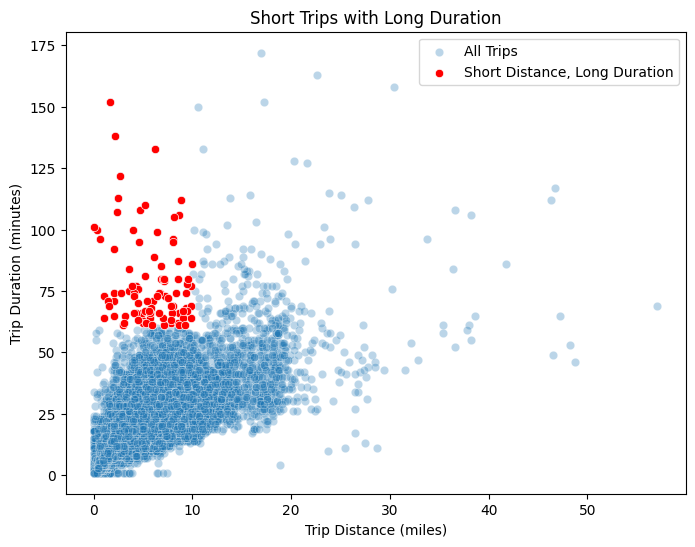

In [46]:
short_long = df[(df['trip_distance'] < 10) & (df['trip_duration_minutes'] > 60)]
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df, 
    x='trip_distance', 
    y='trip_duration_minutes', 
    alpha=0.3, 
    label='All Trips'
)
sns.scatterplot(
    data=short_long, 
    x='trip_distance', 
    y='trip_duration_minutes', 
    color='red', 
    label='Short Distance, Long Duration'
)
plt.title("Short Trips with Long Duration")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Trip Duration (minutes)")
plt.legend()
plt.show()


C:\Users\amali\AppData\Local\Temp\ipykernel_22796\2155734037.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['distance_cluster'] = kmeans.fit_predict(X)
C:\Users\amali\AppData\Local\Temp\ipykernel_22796\2155734037.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['distance_cluster'] = df['distance_cluster'].map(cluster_map)
C:\Users\amali\AppData\Local\Temp\ipykernel_22796\2155734037.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

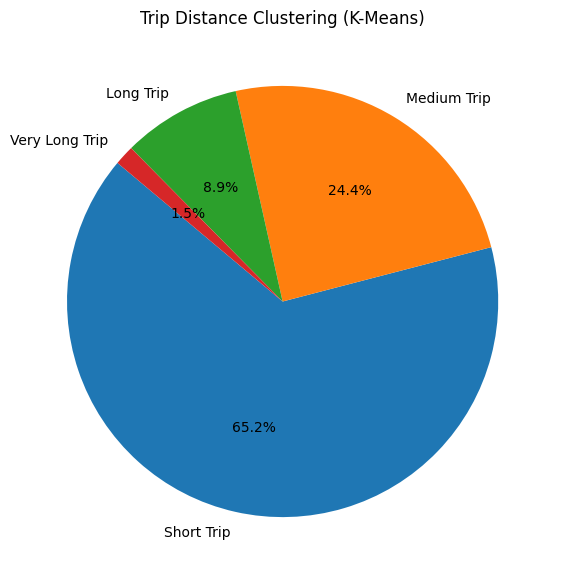

In [47]:
X = np.array(df['trip_distance']).reshape(-1, 1)

kmeans = KMeans(n_clusters=4, random_state=42)
df['distance_cluster'] = kmeans.fit_predict(X)


cluster_order = df.groupby('distance_cluster')['trip_distance'].mean().sort_values().index
cluster_map = {old:i for i, old in enumerate(cluster_order)}
df['distance_cluster'] = df['distance_cluster'].map(cluster_map)


cluster_labels = {
    0: 'Short Trip',
    1: 'Medium Trip',
    2: 'Long Trip',
    3: 'Very Long Trip'
}
df['distance_category'] = df['distance_cluster'].map(cluster_labels)

df['distance_category'].value_counts().plot(
    kind='pie', autopct='%1.1f%%', figsize=(7,7), startangle=140,
    title='Trip Distance Clustering (K-Means)'
)
plt.ylabel('')
plt.show()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,...,total_amount,payment_type,trip_type,congestion_surcharge,trip_duration,trip_duration_minutes,trip_duration_min,avg_speed_mph,distance_cluster,fare_per_mile
count,62261.000000,62261,62261,62261.000000,62261.000000,62261.000000,62261.000000,62261.000000,62261.000000,62261.000000,...,62261.000000,62261.000000,62261.000000,62261.000000,62261.000000,62261.000000,62261.000000,62261.000000,62261.000000,62261.000000
mean,1.878865,2023-01-16 22:02:01.889786624,2023-01-16 22:15:57.979151872,1.050063,97.322722,139.210212,1.304251,2.878004,16.538303,0.868698,...,21.916331,1.337996,1.008031,0.732344,13.934823,13.934823,13.934823,12.117861,0.479433,6.782986
min,1.000000,2022-12-09 14:10:00,2022-12-09 14:22:00,1.000000,3.000000,1.000000,0.000000,0.030000,0.300000,0.000000,...,1.300000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.643421,0.000000,1.541667
25%,2.000000,2023-01-09 11:59:00,2023-01-09 12:11:00,1.000000,74.000000,74.000000,1.000000,1.290000,9.300000,0.000000,...,13.200000,1.000000,1.000000,0.000000,8.000000,8.000000,8.000000,8.666667,0.000000,5.488215
50%,2.000000,2023-01-17 08:49:00,2023-01-17 09:06:00,1.000000,75.000000,139.000000,1.000000,2.000000,13.500000,0.000000,...,18.060000,1.000000,1.000000,0.000000,12.000000,12.000000,12.000000,10.750000,0.000000,6.555556
75%,2.000000,2023-01-24 15:47:00,2023-01-24 16:02:00,1.000000,116.000000,223.000000,1.000000,3.400000,19.800000,1.000000,...,26.210000,2.000000,1.000000,2.750000,17.000000,17.000000,17.000000,13.920000,1.000000,7.802548
max,2.000000,2023-02-01 03:10:00,2023-02-01 03:40:00,99.000000,265.000000,265.000000,7.000000,57.090000,322.900000,7.500000,...,347.000000,4.000000,2.000000,2.750000,172.000000,172.000000,172.000000,283.200000,3.000000,13.230769
std,0.326287,NaN,NaN,0.963892,59.883134,76.480369,0.964913,2.772321,11.655446,1.288558,...,13.924172,0.479941,0.089254,1.215517,9.640752,9.640752,9.640752,5.643846,0.723575,1.822239


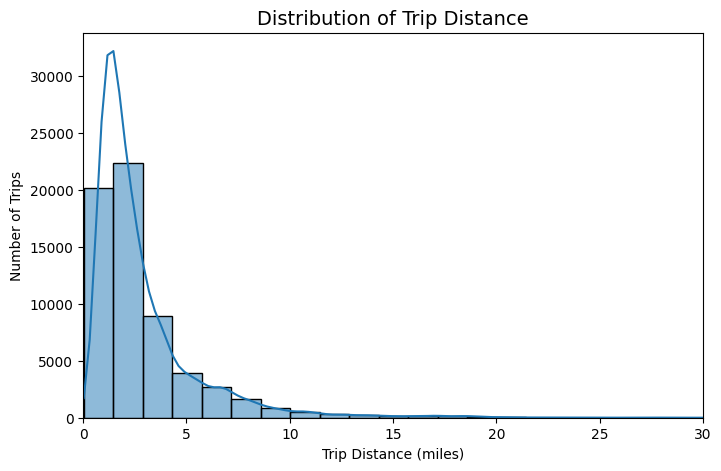

In [51]:
plt.figure(figsize=(8,5))
sns.histplot(df['trip_distance'], bins=40, kde=True)
plt.title("Distribution of Trip Distance", fontsize=14)
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Number of Trips")
plt.xlim(0, 30)  # optional: limit to remove long tail
plt.show()

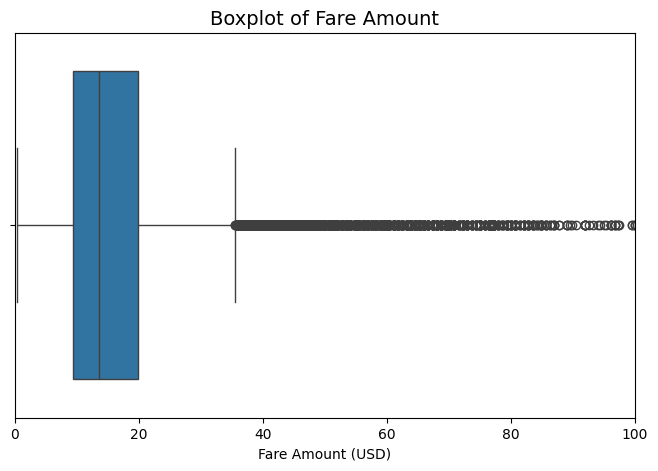

In [55]:
df['congestion_surcharge'].value_counts(dropna=False)


congestion_surcharge
0.00    45679
2.75    16566
2.50       16
Name: count, dtype: int64

In [56]:
congestion_trips = df[df['congestion_surcharge'] > 0]
num_congested = len(congestion_trips)
total_trips = len(df)
percentage_congested = (num_congested / total_trips) * 100

print(f"Number of trips with congestion surcharge: {num_congested:,}")
print(f"Percentage of total trips affected by congestion: {percentage_congested:.2f}%")


Number of trips with congestion surcharge: 16,582
Percentage of total trips affected by congestion: 26.63%


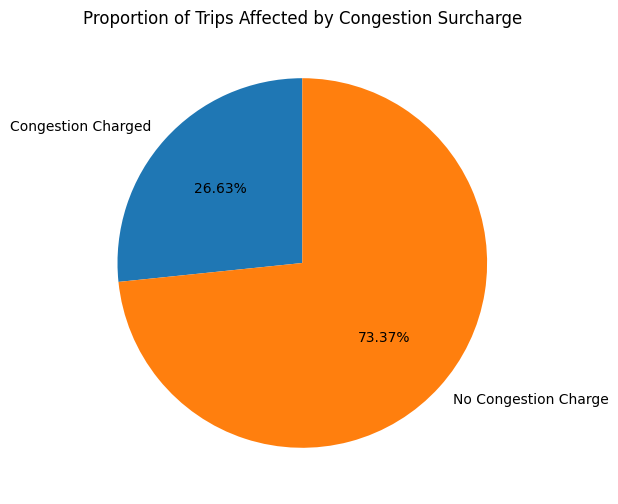

In [57]:
labels = ['Congestion Charged', 'No Congestion Charge']
sizes = [num_congested, total_trips - num_congested]

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90)
plt.title("Proportion of Trips Affected by Congestion Surcharge")
plt.show()


In [63]:

low_speed_threshold = 10  # mph


low_speed_trips = df[df['avg_speed_mph'] < low_speed_threshold]


proportion_low_speed = len(low_speed_trips) / len(df) * 100

print(f"Low-speed trips (<{low_speed_threshold} mph): {len(low_speed_trips)}")
print(f"Proportion of low-speed trips: {proportion_low_speed:.2f}%")



Low-speed trips (<10 mph): 25467
Proportion of low-speed trips: 40.90%


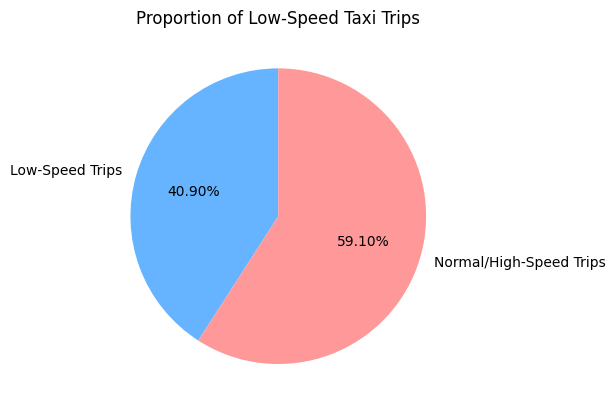

In [64]:


labels = ['Low-Speed Trips', 'Normal/High-Speed Trips']
sizes = [len(low_speed_trips), len(df) - len(low_speed_trips)]
colors = ['#66b3ff', '#ff9999']

plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90, colors=colors)
plt.title('Proportion of Low-Speed Taxi Trips')
plt.show()
